In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [240]:
df = pd.read_csv('income_evaluation.csv')

In [241]:
df.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [242]:
df.rename(columns=lambda x: x.replace(' ',''),inplace=True)

<AxesSubplot:xlabel='income', ylabel='count'>

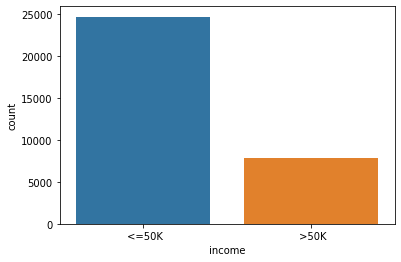

In [243]:
sns.countplot(x='income',data=df)

In [253]:
print(f'Less than 50k: {df["income"].value_counts()[0]/df["income"].count()}%')
print(f'More than 50k: {df["income"].value_counts()[1]/df["income"].count()}%')

Less than 50k: 0.7591904425539756%
More than 50k: 0.2408095574460244%


In [212]:
df.count()

age               32561
workclass         32561
fnlwgt            32561
education         32561
education-num     32561
marital-status    32561
occupation        32561
relationship      32561
race              32561
sex               32561
capital-gain      32561
capital-loss      32561
hours-per-week    32561
native-country    32561
income            32561
dtype: int64

In [213]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1836
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
 Without-pay            14
 Never-worked            7
Name: workclass, dtype: int64

In [214]:
df['workclass'].replace(' Without-pay',' ?',inplace=True)
df['workclass'].replace(' Never-worked',' ?',inplace=True)

In [215]:
df['workclass'].value_counts()

 Private             22696
 Self-emp-not-inc     2541
 Local-gov            2093
 ?                    1857
 State-gov            1298
 Self-emp-inc         1116
 Federal-gov           960
Name: workclass, dtype: int64

In [216]:
df['education'].value_counts()

 HS-grad         10501
 Some-college     7291
 Bachelors        5355
 Masters          1723
 Assoc-voc        1382
 11th             1175
 Assoc-acdm       1067
 10th              933
 7th-8th           646
 Prof-school       576
 9th               514
 12th              433
 Doctorate         413
 5th-6th           333
 1st-4th           168
 Preschool          51
Name: education, dtype: int64

In [217]:
df['occupation'].value_counts()

 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Other-service        3295
 Machine-op-inspct    2002
 ?                    1843
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [218]:
df['occupation'].replace(' ?',' Other-service',inplace=True)

In [219]:
df['occupation'].value_counts()

 Other-service        5138
 Prof-specialty       4140
 Craft-repair         4099
 Exec-managerial      4066
 Adm-clerical         3770
 Sales                3650
 Machine-op-inspct    2002
 Transport-moving     1597
 Handlers-cleaners    1370
 Farming-fishing       994
 Tech-support          928
 Protective-serv       649
 Priv-house-serv       149
 Armed-Forces            9
Name: occupation, dtype: int64

In [220]:
df['relationship'].value_counts()

 Husband           13193
 Not-in-family      8305
 Own-child          5068
 Unmarried          3446
 Wife               1568
 Other-relative      981
Name: relationship, dtype: int64

In [221]:
df['race'].value_counts()

 White                 27816
 Black                  3124
 Asian-Pac-Islander     1039
 Amer-Indian-Eskimo      311
 Other                   271
Name: race, dtype: int64

In [222]:
df['sex'].replace(lambda x: )
df['sex'].value_counts()

 Male      21790
 Female    10771
Name: sex, dtype: int64

In [223]:
df['native-country'].value_counts()

 United-States                 29170
 Mexico                          643
 ?                               583
 Philippines                     198
 Germany                         137
 Canada                          121
 Puerto-Rico                     114
 El-Salvador                     106
 India                           100
 Cuba                             95
 England                          90
 Jamaica                          81
 South                            80
 China                            75
 Italy                            73
 Dominican-Republic               70
 Vietnam                          67
 Guatemala                        64
 Japan                            62
 Poland                           60
 Columbia                         59
 Taiwan                           51
 Haiti                            44
 Iran                             43
 Portugal                         37
 Nicaragua                        34
 Peru                             31
 

In [224]:
df = pd.get_dummies(df,columns=['workclass','education','marital-status','occupation'
                           ,'relationship','sex','native-country','race'],drop_first=True)

In [225]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,income,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,...,native-country_ Taiwan,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White
0,39,77516,13,2174,0,40,<=50K,0,0,0,...,0,0,0,1,0,0,0,0,0,1
1,50,83311,13,0,0,13,<=50K,0,0,0,...,0,0,0,1,0,0,0,0,0,1
2,38,215646,9,0,0,40,<=50K,0,0,1,...,0,0,0,1,0,0,0,0,0,1
3,53,234721,7,0,0,40,<=50K,0,0,1,...,0,0,0,1,0,0,0,1,0,0
4,28,338409,13,0,0,40,<=50K,0,0,1,...,0,0,0,0,0,0,0,1,0,0


In [226]:
df = pd.get_dummies(df,columns=['income'],drop_first=True)

In [227]:
df.head()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week,workclass_ Federal-gov,workclass_ Local-gov,workclass_ Private,workclass_ Self-emp-inc,...,native-country_ Thailand,native-country_ Trinadad&Tobago,native-country_ United-States,native-country_ Vietnam,native-country_ Yugoslavia,race_ Asian-Pac-Islander,race_ Black,race_ Other,race_ White,income_ >50K
0,39,77516,13,2174,0,40,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
1,50,83311,13,0,0,13,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2,38,215646,9,0,0,40,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
3,53,234721,7,0,0,40,0,0,1,0,...,0,0,1,0,0,0,1,0,0,0
4,28,338409,13,0,0,40,0,0,1,0,...,0,0,0,0,0,0,1,0,0,0


In [228]:
from sklearn.model_selection import train_test_split

In [229]:
X = df.drop(['income_ >50K'],axis=1)
y = df['income_ >50K']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=101)

In [230]:
from sklearn.linear_model import LogisticRegression

In [231]:
reg = LogisticRegression()

In [232]:
reg.fit(X_train,y_train)

LogisticRegression()

In [233]:
reg.intercept_

array([-0.00035511])

In [234]:
predictions = reg.predict(X_test)

In [235]:
from sklearn.metrics import classification_report,confusion_matrix

In [236]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.81      0.97      0.88      7436
           1       0.74      0.28      0.41      2333

    accuracy                           0.80      9769
   macro avg       0.77      0.62      0.64      9769
weighted avg       0.79      0.80      0.77      9769



In [237]:
print(confusion_matrix(y_test,predictions))

[[7202  234]
 [1681  652]]
